In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#run this to check if gpu is avaiable or not.
!nvidia-smi
#if this gives an error, you should change runtime to gpu.

Mon Jun 20 08:51:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#clone this repo for model training and deployment
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12262, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12262 (delta 2), reused 6 (delta 1), pack-reused 12250
Receiving objects: 100% (12262/12262), 12.00 MiB | 29.05 MiB/s, done.
Resolving deltas: 100% (8488/8488), done.


**Importing dataset from roboflow**



* Export your dataset as YOLO v5 PyTorch format
* Select download code


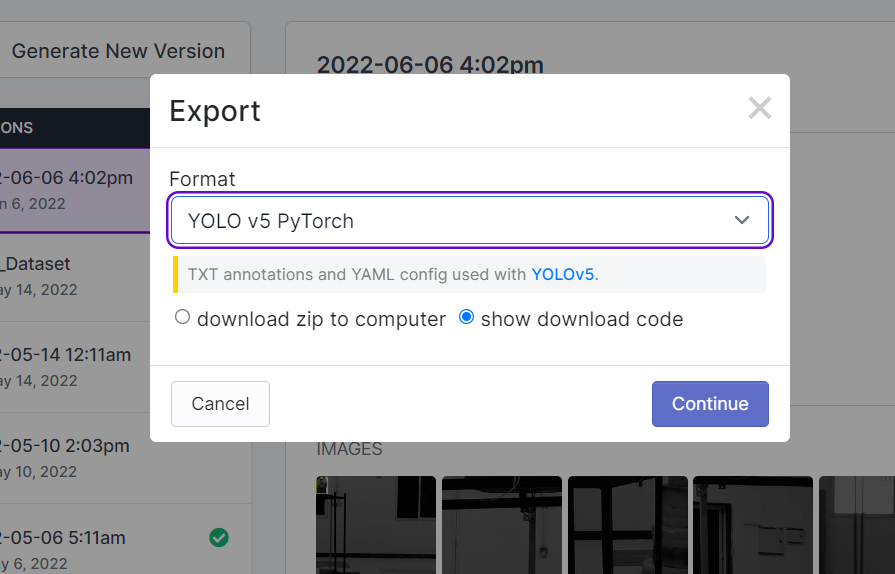

* run this following command in terminal
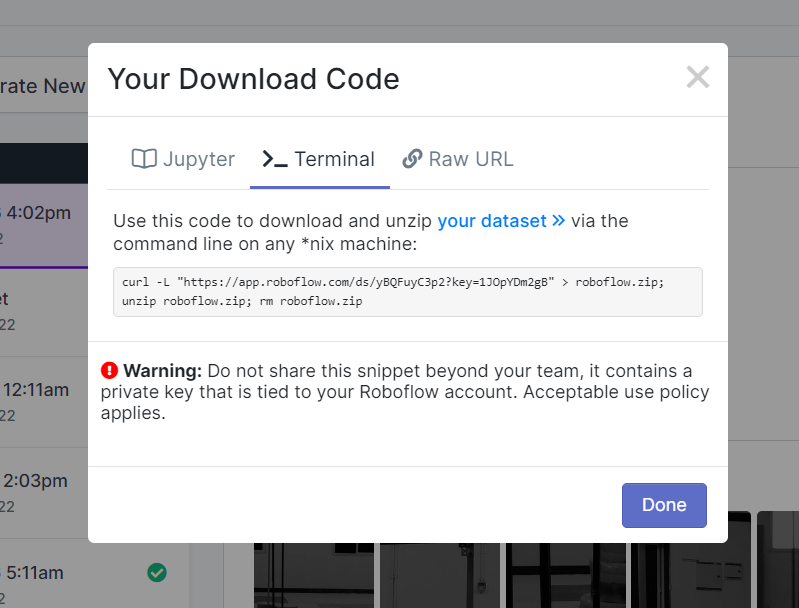

* This command contains a private key.
* Key will change for different dataset.

In [4]:
cd yolov5

/content/yolov5


In [5]:
#After successfully imported dataset change the directory to yolov5 and install requirements.txt
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 7.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
!curl -L "https://app.roboflow.com/ds/yeO4xXQYAj?key=OWYXL9SbUV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: test/images/IMG_20220512_193136_jpg.rf.8e305400ab8e7677bd768f15e4c0a000.jpg  
 extracting: test/images/IMG_20220512_193139_jpg.rf.fe85b95280cbb3af19c9eae776a941d8.jpg  
 extracting: test/images/IMG_20220512_193140_jpg.rf.6198babe523f517581f0a9c1f4d93ab5.jpg  
 extracting: test/images/IMG_20220512_193142_jpg.rf.d8d98abfe20f576923c8f63f1e0258cd.jpg  
 extracting: test/images/IMG_20220512_193144_jpg.rf.1d8d141d4a375c8243b45d901bd80f41.jpg  
 extracting: test/images/IMG_20220512_193147_jpg.rf.1211393f092017c2b9f0695f0725330d.jpg  
 extracting: test/images/IMG_20220512_193148_jpg.rf.245980f439a1c4e9e007edf9ddf4c620.jpg  
 extracting: test/images/IMG_20220512_193150_jpg.rf.7b96419836eb10a934f04495915fe82a.jpg  
 extracting: test/images/IMG_20220512_193152_jpg.rf.849af547bd394b3d83188d888b304322.jpg  
 extracting: test/images/IMG_20220512_193153_jpg.rf.e8f7c93d9d8334b181f0a5acc3f5b5ac.jpg  
 extracting: test/images/IMG_20220512_1

***How to train your dataset?***


---

* Open data.yaml file(if you don't have data.yaml file create one).
* Add this in yaml file(add the correct path to the directories).

```
train: /content/yolov5/train/images
val: /content/yolov5/valid/images

nc: 1
names: ['BOH']
```

***Training commands***

---
* when you increase batch size it'll utilize more GPU(In simple terms more batch size will train faster).
* when you increase epochs it'll repeat more cycles to check dataset.
```
!python train.py --img 416 --batch 190 --epochs 100 --data data.yaml --weights yolov5s.pt --device 0
```
*This command will generate the pytorch model in the following directory:
```
  runs/train/exp/weights/yourmodel.pt
```

In [7]:
!python train.py --img 416 --batch 190 --epochs 100 --data data.yaml --weights yolov5s.pt --device 0

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=190, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees

***How to deploy model?***

---
* For deployment of your model run this following command:
```
!python detect.py --weights runs/train/exp/weights/yourmodel.pt --source img.jpeg
```

* You can also pass the following parameters to source:

```
--source 0  # webcam
         img.jpg  # image
         vid.mp4  # video
         path/  # directory
         path/*.jpg  # glob
         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

* If you want to deploy your model on a host device then you should download yourmodel.pt file from the runs directory.
* Import this model in your in main code.